In [1]:
import numpy as np

[ 5 10]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]
CV Score is  0.9999798776395277


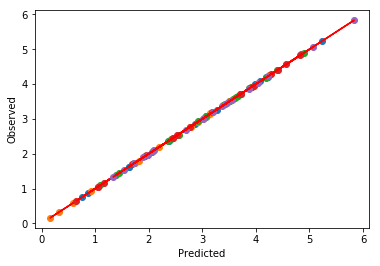

In [7]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression


def hidden_model(x):
    # y is a linear combination of columns 5 and 10...
    result = x[:, 5] + x[:, 10]
    # ... with a little noise
    result += np.random.normal(0, .005, result.shape)
    return result


def make_x(nobs):
    return np.random.uniform(0, 3, (nobs, 10 ** 6))

x = make_x(100)
y = hidden_model(x)  # 用了col5与col10的特征作为目标

# k:Number of top features to select.
# f_regression:
# Linear model for testing the individual effect of each of many regressors.
# This is a scoring function to be used in a feature seletion procedure, not
# a free standing feature selection procedure.
# This is done in 2 steps:
#
# 1. The correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).
# 2. It is converted to an F score then to a p-value.

selector = SelectKBest(f_regression, k=2).fit(x, y)
best_features = np.where(selector.get_support())[0]
print(best_features)

x2 = x[:, best_features]
clf = LinearRegression().fit(x2, y)
y2p = clf.predict(x2)

scores = []
#for train, test in KFold(len(y), n_splits=5):
for train, test in KFold(n_splits=5).split(x):
    xtrain, xtest, ytrain, ytest = x[train], x[test], y[train], y[test]

    # 1.进行特征选择
    b = SelectKBest(f_regression, k=2) #选择最好的两个特征列
    b.fit(xtrain, ytrain)
    print(b.get_support()) # [False False False ... False False False]
    
    # 2.使用选择后的特征进行训练
    xtrain = xtrain[:, b.get_support()]
    xtest = xtest[:, b.get_support()]
    clf.fit(xtrain, ytrain)
    scores.append(clf.score(xtest, ytest))

    yp = clf.predict(xtest)
    
    plt.plot(yp, ytest, 'o') # test集上预测
    
    plt.plot(ytest, ytest, 'r-') # 真实的label

plt.xlabel("Predicted")
plt.ylabel("Observed")

print("CV Score is ", np.mean(scores))


In [9]:
from sklearn.feature_extraction import DictVectorizer
v = DictVectorizer(sparse=False)

In [10]:
v

DictVectorizer(dtype=<class 'numpy.float64'>, separator='=', sort=True,
        sparse=False)

In [11]:
 D = [{'foo': 1, 'bar': 2}, {'foo': 3, 'baz': 1}]

In [12]:
X = v.fit_transform(D)

In [13]:
v.vocabulary_  #词典

{'bar': 0, 'baz': 1, 'foo': 2}

In [14]:
v.feature_names_  # key

['bar', 'baz', 'foo']

In [20]:
"""
array([[2., 0., 1.],
       [0., 1., 3.]])
    
[2,0,1]代表第一个样本中bar出现了2次, foo出现了1次
"""

'\narray([[2., 0., 1.],\n       [0., 1., 3.]])\n    \n[2,0,1]代表第一个样本中bar出现了2次, foo出现了1次\n'

In [22]:
X

array([[2., 0., 1.],
       [0., 1., 3.]])

In [23]:
from sklearn.feature_extraction import FeatureHasher

In [24]:
h = FeatureHasher(n_features=10)

In [25]:
 D = [{'dog': 1, 'cat':2, 'elephant':4},{'dog': 2, 'run': 5}]

In [26]:
f = h.transform(D)

In [27]:
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

In [33]:
np.r_[np.array([1,2,3]), 0, 0, np.array([4,5,6])]

array([1, 2, 3, 0, 0, 4, 5, 6])

In [38]:
import numpy as np
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(np.array([[0, 1, 1], [1, 0, 0]]))
lb.classes_

array([0, 1, 2])

In [39]:
lb.transform([0, 1, 2, 1])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

In [44]:
import pandas as pd
x=pd.Series([1,2,35,6,7])

In [45]:
x

0     1
1     2
2    35
3     6
4     7
dtype: int64

In [46]:
x.ptp?

In [47]:
x.map?